<a href="https://colab.research.google.com/github/khloud-ibrahim/blank-app/blob/main/Preprocessing_FP_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import files
uploaded = files.upload()


Saving data_mining_exam_dataset.csv to data_mining_exam_dataset (1).csv


In [32]:
import pandas as pd
import numpy as np


In [33]:
df = pd.read_csv("data_mining_exam_dataset.csv")
df.head()



,student_id,question_id,topic,difficulty,question_type,student_answer,correct_answer,is_correct,score,time_spent
0,S82,Q8,Classification,Hard,True/False,Decision Tree,Decision Tree,1,1,25
1,S29,Q9,Clustering,Hard,MCQ,Initial centroids,Initial centroids,1,1,47
2,S55,Q3,Classification,Easy,MCQ,Decision Tree,Decision Tree,1,1,24
3,S65,Q39,Classification,Hard,MCQ,Decision Tree,Decision Tree,1,1,55
4,S84,Q45,Evaluation Metrics,Medium,MCQ,Detect anomalies,Accuracy,0,0,47


In [34]:
#data inspection
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   student_id      1200 non-null   object
 1   question_id     1200 non-null   object
 2   topic           1200 non-null   object
 3   difficulty      1200 non-null   object
 4   question_type   1200 non-null   object
 5   student_answer  1200 non-null   object
 6   correct_answer  1200 non-null   object
 7   is_correct      1200 non-null   int64 
 8   score           1200 non-null   int64 
 9   time_spent      1200 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 93.9+ KB


,0
student_id,0
question_id,0
topic,0
difficulty,0
question_type,0
student_answer,0
correct_answer,0
is_correct,0
score,0
time_spent,0


In [35]:
#cleaning Text Columns
df.drop_duplicates(inplace=True)

df["topic"] = df["topic"].str.strip()
df["difficulty"] = df["difficulty"].str.capitalize()


In [36]:
#handel missing values
# Categorical → Mode
df["topic"] = df["topic"].fillna(df["topic"].mode()[0])
df["difficulty"] = df["difficulty"].fillna(df["difficulty"].mode()[0])
# Numerical → Mean
df["time_spent"] = df["time_spent"].fillna(df["time_spent"].mean())
# Critical column → Drop
df.dropna(subset=["is_correct"], inplace=True)


In [37]:
#Create Result Column
df["result"] = df["is_correct"].apply(
    lambda x: "Correct" if x == 1 else "Wrong"
)


In [38]:
#Create Transaction Column
df["transaction"] = df.apply(
    lambda row: [
        f"Student_{row['student_id']}",
        f"Topic_{row['topic']}",
        f"Difficulty_{row['difficulty']}",
        row["result"]
    ],
    axis=1
)

df["transaction"].head()


,transaction
0,"[Student_S82, Topic_Classification, Difficulty..."
1,"[Student_S29, Topic_Clustering, Difficulty_Har..."
2,"[Student_S55, Topic_Classification, Difficulty..."
3,"[Student_S65, Topic_Classification, Difficulty..."
4,"[Student_S84, Topic_Evaluation Metrics, Diffic..."


In [40]:
df.to_csv("processed_data.csv", index=False)


In [41]:
files.download("processed_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
# 1 Imports for Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# لتحسين شكل الرسومات
sns.set(style="whitegrid")


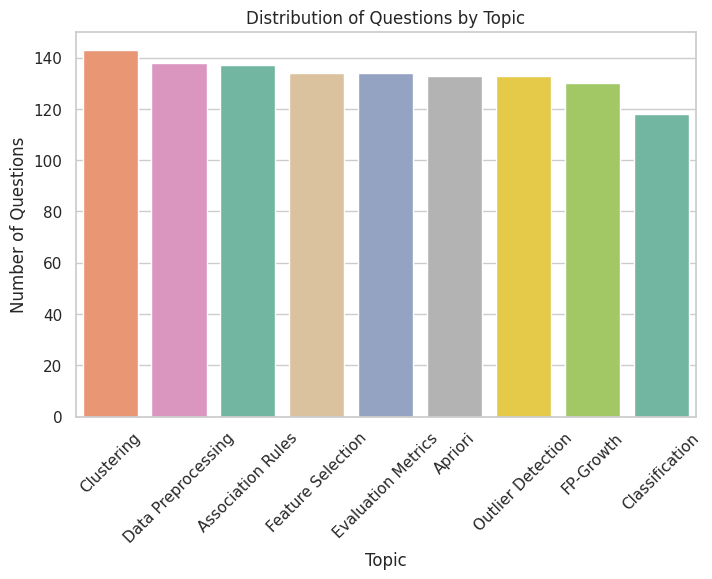

In [43]:

#  Distribution of Topics

plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="topic",
    hue="topic",
    order=df["topic"].value_counts().index,
    palette="Set2",
    legend=False
)
plt.title("Distribution of Questions by Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45)
plt.show()



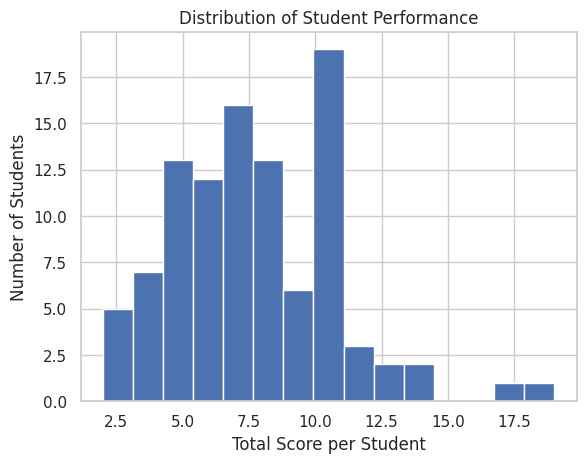

In [44]:
import matplotlib.pyplot as plt

student_scores = df.groupby("student_id")["score"].sum()

plt.figure()
plt.hist(student_scores, bins=15)
plt.xlabel("Total Score per Student")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Performance")
plt.show()


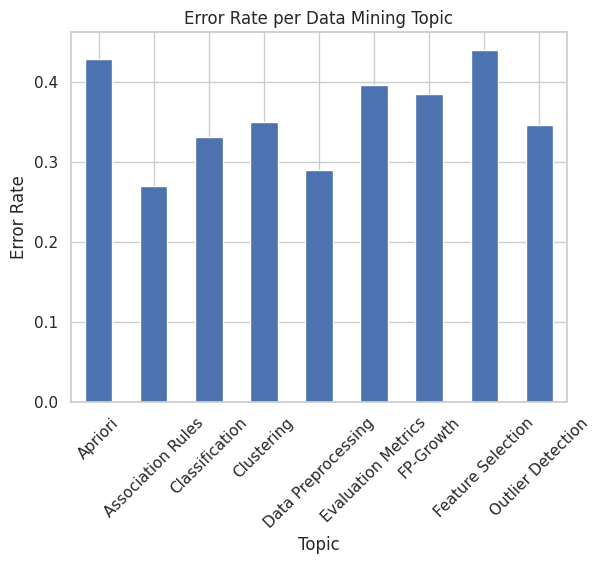

In [45]:
topic_error_rate = df.groupby("topic")["is_correct"].mean()
topic_error_rate = 1 - topic_error_rate

plt.figure()
topic_error_rate.plot(kind="bar")
plt.xlabel("Topic")
plt.ylabel("Error Rate")
plt.title("Error Rate per Data Mining Topic")
plt.xticks(rotation=45)
plt.show()


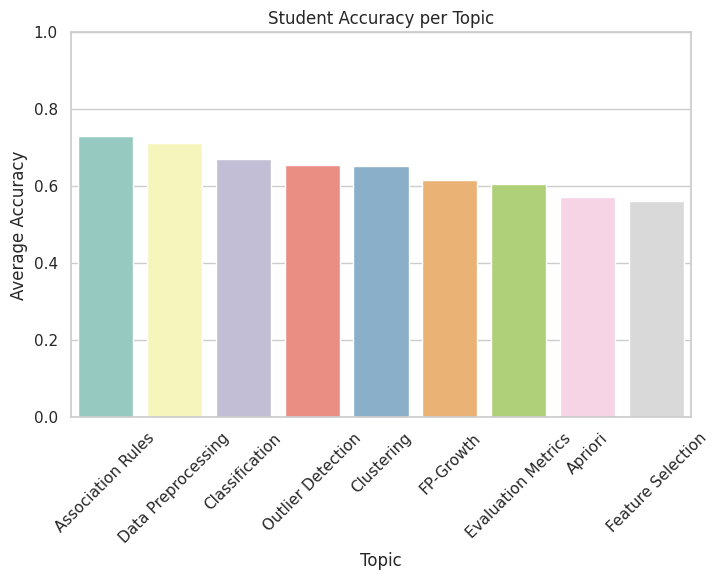

In [46]:

#  Accuracy per Topic
plt.figure(figsize=(8,5))
sns.barplot(
    x=accuracy_topic.index,
    y=accuracy_topic.values,
    hue=accuracy_topic.index,
    palette="Set3",
    legend=False
)
plt.title("Student Accuracy per Topic")
plt.xlabel("Topic")
plt.ylabel("Average Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()



<Figure size 640x480 with 0 Axes>

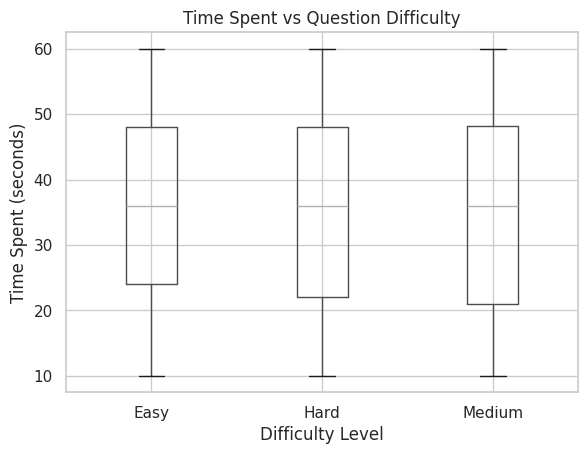

In [47]:
plt.figure()
df.boxplot(column="time_spent", by="difficulty")
plt.xlabel("Difficulty Level")
plt.ylabel("Time Spent (seconds)")
plt.title("Time Spent vs Question Difficulty")
plt.suptitle("")
plt.show()
